<a href="https://colab.research.google.com/github/vicentbas/ia3_uv/blob/main/ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![IDAL](https://i.imgur.com/tIKXIG1.jpg)  

#**Máster en Inteligencia Artificial Avanzada y Aplicada:  IA^3**
---
# Trabajo evaluación bloque 2: Clasificador de electrocardiogramas mediante LSTM

#<strong><center> ECG analyzer </strong></center>

El objetivo del siguiente proyecto es crear un clasificador de electrocardiogramas, capaz de diferencias entre estudios patológicos y estudios normales. Como entrada al proyecto se utilzan ficheros XML exportados desde el sistema Philips IntelliSpace ECG B.00.02 en formato XML FDA para electrocardiografos de 12 derivaciones.

In [1]:
from xml.dom import minidom
from os import listdir
import re
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_data(file):
  ecg_xml = minidom.parse(file) 
  ecg_leads_beats = ecg_xml.getElementsByTagName('digits')
  ecg_leads = pd.DataFrame({'lead':[]})
  for idx, ecg_lead_beat in enumerate(ecg_leads_beats):
    ecg_lead_beat = ecg_lead_beat.firstChild.data
    ecg_lead_beat = ecg_lead_beat.replace("\n","")
    ecg_lead_beat = ecg_lead_beat.replace("\t","")
    ecg_lead_beat = ecg_lead_beat.replace("  ","")
    ecg_lead_beat = ecg_lead_beat.split(" ")[:-1]
    ecg_lead_beat = np.array(ecg_lead_beat,dtype=float)
    if idx < 12:
      ecg_leads = ecg_leads.append(pd.DataFrame({'lead':[ecg_lead_beat]}), ignore_index=True)
  return ecg_leads

In [3]:
ecg_studies = pd.DataFrame({'study':[], 'diagnose':[]})
for file in listdir('/content/ecg/'):
  ecg_leads = extract_data('/content/ecg/'+file)
  ecg_studies = ecg_studies.append(pd.DataFrame({'study':[ecg_leads], 'diagnose':'normal'}), ignore_index=True)

# Ploting sample leads

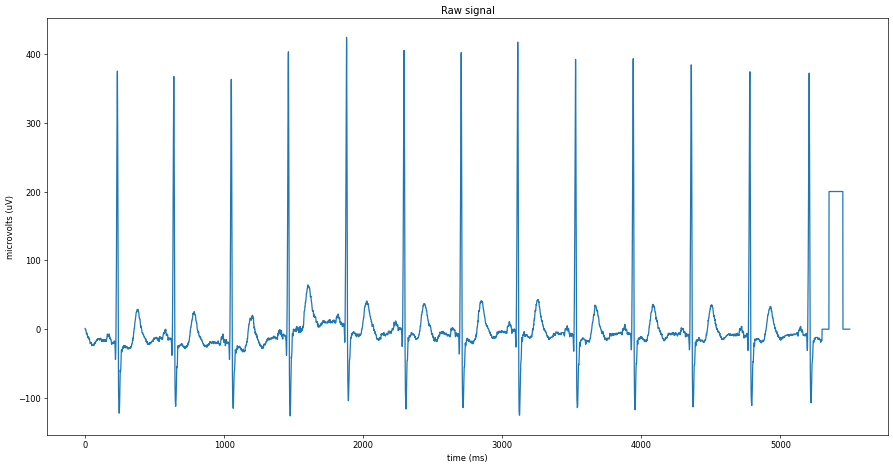

In [4]:
plt.figure(figsize=(15,15), dpi= 60)
plt.subplot(2, 1, 1)
plt.plot(ecg_studies['study'][1]['lead'][9])
plt.xlabel('time (ms)')
plt.ylabel('microvolts (uV)')
plt.title("Raw signal")
plt.tight_layout()
plt.show()

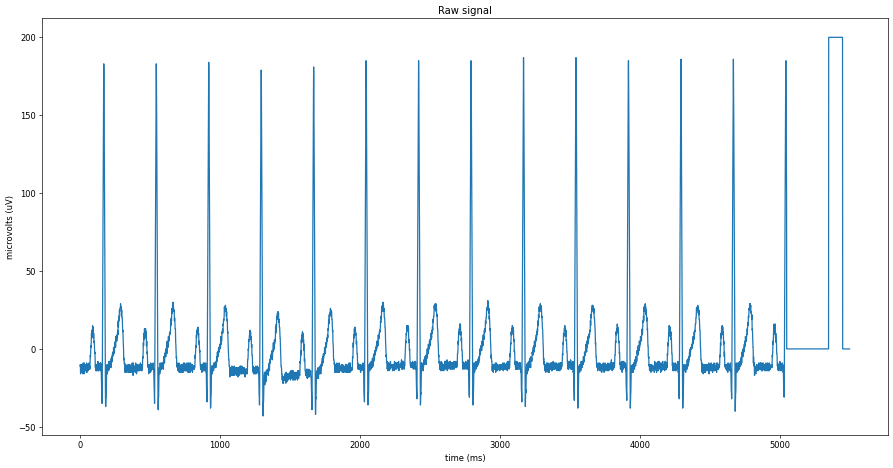

In [5]:
plt.figure(figsize=(15,15), dpi= 60)
plt.subplot(2, 1, 1)
plt.plot(ecg_studies['study'][2]['lead'][1])
plt.xlabel('time (ms)')
plt.ylabel('microvolts (uV)')
plt.title("Raw signal")
plt.tight_layout()
plt.show()

# Understanding data structure
Anidación de dataframes, con un primer nivel para estudios y un segundo nivel para cada una de las derivaciones

In [6]:
print(ecg_studies)

                                               study diagnose
0                                                ...   normal
1                                                ...   normal
2                                                ...   normal
3                                                ...   normal


In [7]:
print(ecg_studies['diagnose'][1])

normal


In [8]:
print(ecg_studies['study'][1])

                                                 lead
0   [-9.0, -10.0, -11.0, -10.0, -11.0, -11.0, -13....
1   [-15.0, -18.0, -19.0, -19.0, -19.0, -19.0, -20...
2   [-8.0, -9.0, -9.0, -10.0, -9.0, -7.0, -8.0, -7...
3   [12.0, 14.0, 16.0, 15.0, 16.0, 15.0, 17.0, 16....
4   [-1.0, 0.0, -1.0, 1.0, -1.0, -1.0, -2.0, -3.0,...
5   [-12.0, -14.0, -15.0, -15.0, -15.0, -14.0, -15...
6   [-1.0, 0.0, 1.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0...
7   [17.0, 16.0, 16.0, 15.0, 16.0, 15.0, 13.0, 13....
8   [10.0, 9.0, 10.0, 8.0, 9.0, 8.0, 6.0, 3.0, 4.0...
9   [1.0, 0.0, 0.0, -1.0, -1.0, -1.0, -2.0, -3.0, ...
10  [10.0, 9.0, 8.0, 6.0, 6.0, 5.0, 3.0, 4.0, 2.0,...
11  [-5.0, -4.0, -5.0, -6.0, -7.0, -8.0, -8.0, -8....


In [9]:
ecg_studies['study'][1]['lead'][9]

array([1., 0., 0., ..., 0., 0., 0.])

# Data normalization